A. Menelaah data dengan Metode Statistik

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/CLUSTER.csv")

In [ ]:
df.dtypes

Provinsi     object
 Suhu       float64
 Angin      float64
 Hujan      float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provinsi  34 non-null     object 
 1    Suhu     34 non-null     float64
 2    Angin    34 non-null     float64
 3    Hujan    34 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.2+ KB


In [ ]:
df.columns

Index(['Provinsi', ' Suhu', ' Angin', ' Hujan'], dtype='object')

In [ ]:
# First 5 rows of our data
df.head()

,Provinsi,Suhu,Angin,Hujan
0,Aceh,27.1,2.71,1575.0
1,Sumatera Utara,27.4,2.38,975.9
2,Sumatera Barat,26.5,2.88,3548.0
3,Riau,27.2,2.97,2048.3
4,Jambi,27.0,2.39,1694.9


In [ ]:
df.describe()

,Suhu,Angin,Hujan
count,34.000000,34.000000,34.000000
mean,27.202941,2.421471,1871.032353
std,0.869164,0.850049,716.155671
min,23.500000,0.070000,460.900000
25%,27.000000,1.950000,1334.075000
50%,27.300000,2.365000,1877.100000
75%,27.675000,2.912500,2238.000000
max,28.500000,4.050000,3548.000000


In [ ]:
df.value_counts()

Provinsi                    Suhu   Angin   Hujan
Sumatera Utara             27.4   2.38    975.9     1
Jawa Barat                 23.5   2.14    2199.3    1
Kalimantan Timur           27.9   1.96    2069.4    1
Kalimantan Tengah          27.7   2.17    2748.4    1
Kalimantan Selatan         27.0   1.92    2509.6    1
Kalimantan Barat           26.9   1.75    2757.7    1
Jawa Timur                 28.0   3.88    2024.7    1
Jawa Tengah                28.5   2.83    1620.7    1
Jambi                      27.0   2.39    1694.9    1
Sumatera Selatan           27.7   3.32    1947.2    1
Gorontalo                  27.3   1.95    870.6     1
DKI Jakarta                28.4   1.54    2169.5    1
DI Yogyakarta              26.1   0.07    2045.5    1
Bengkulu                   27.0   2.12    2668.9    1
Banten                     27.3   0.99    1310.1    1
Bali                       27.3   3.27    1133.8    1
Kalimantan Utara           27.6   2.20    2311.5    1
Kepulauan Bangka Belitung  27.3  

In [ ]:
df.corr()

,Suhu,Angin,Hujan
Suhu,1.000000,0.144571,-0.206469
Angin,0.144571,1.000000,-0.091813
Hujan,-0.206469,-0.091813,1.000000


B. Menelaah data dengan Visualisasi

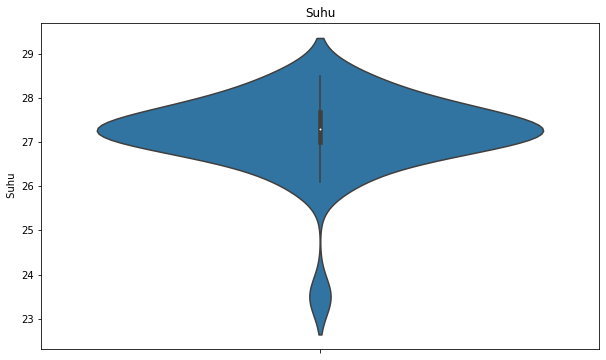

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Suhu")
sns.axes_style("dark")
sns.violinplot(y=df[' Suhu'])
plt.show()

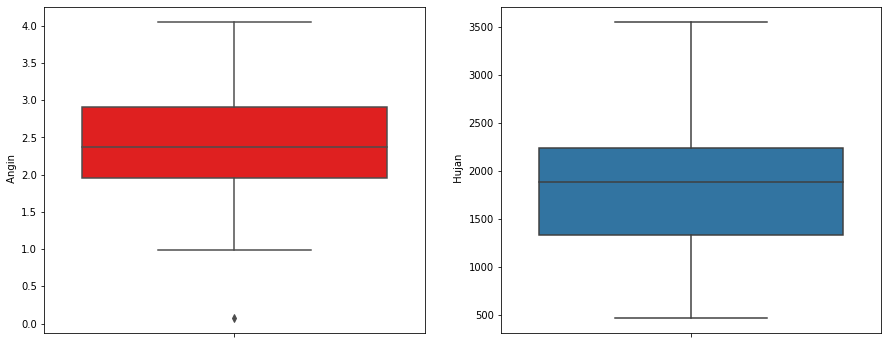

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df[' Angin'], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df[' Hujan'])
plt.show()

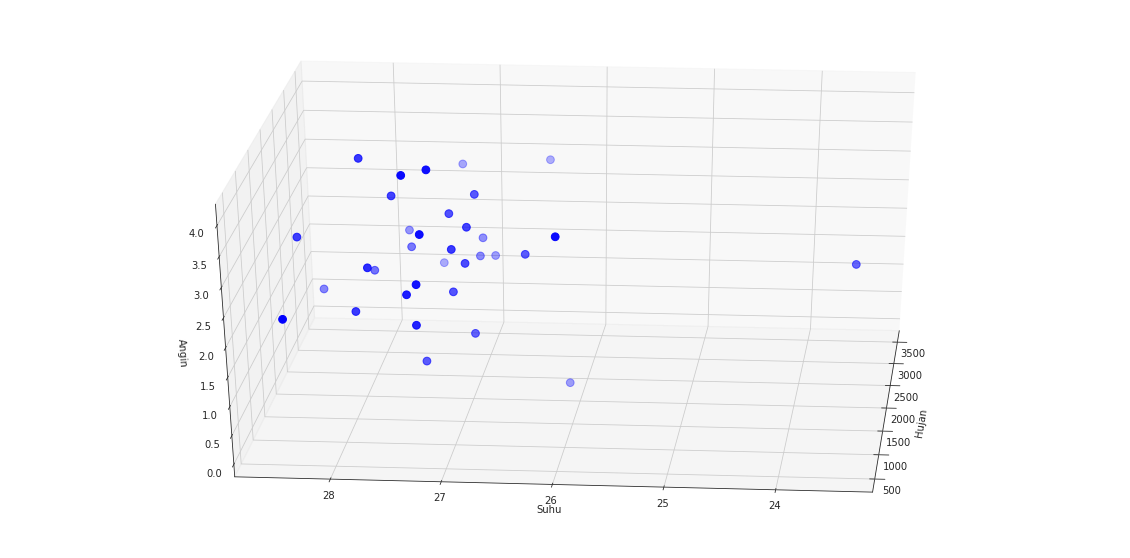

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[' Hujan'], df[' Suhu'], df[' Angin'], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Hujan")
plt.ylabel("Suhu")
ax.set_zlabel('Angin')
plt.show()

In [ ]:
X = df.iloc[:, [1, 3]].values
X

array([[  27.1, 1575. ],
       [  27.4,  975.9],
       [  26.5, 3548. ],
       [  27.2, 2048.3],
       [  27. , 1694.9],
       [  27.7, 1947.2],
       [  27. , 2668.9],
       [  27.1, 1628.1],
       [  27.3, 1534.7],
       [  27. , 2250.9],
       [  28.4, 2169.5],
       [  23.5, 2199.3],
       [  28.5, 1620.7],
       [  26.1, 2045.5],
       [  28. , 2024.7],
       [  27.3, 1310.1],
       [  27.3, 1133.8],
       [  26.1, 1147.9],
       [  27.5, 1406. ],
       [  26.9, 2757.7],
       [  27.7, 2748.4],
       [  27. , 2509.6],
       [  27.9, 2069.4],
       [  27.6, 2311.5],
       [  27. , 1807. ],
       [  28.4,  460.9],
       [  27.3, 3382. ],
       [  26.9, 1589.6],
       [  27.3,  870.6],
       [  27.9, 1167.9],
       [  26.5, 1987.2],
       [  27.3,  913.4],
       [  27.4, 2844.6],
       [  27.8, 1265.9]])

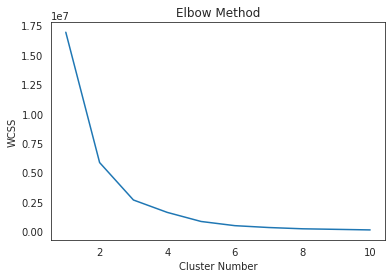

In [ ]:
from sklearn.cluster import KMeans
# Optimasi K-Means dengan metode elbow untuk menentukan jumlah klaster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Proses K-Means Clustering
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

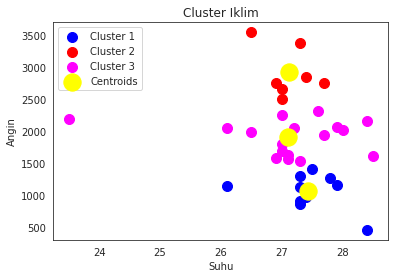

In [ ]:
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster Iklim')
plt.xlabel('Suhu')
plt.ylabel('Angin')
plt.legend()

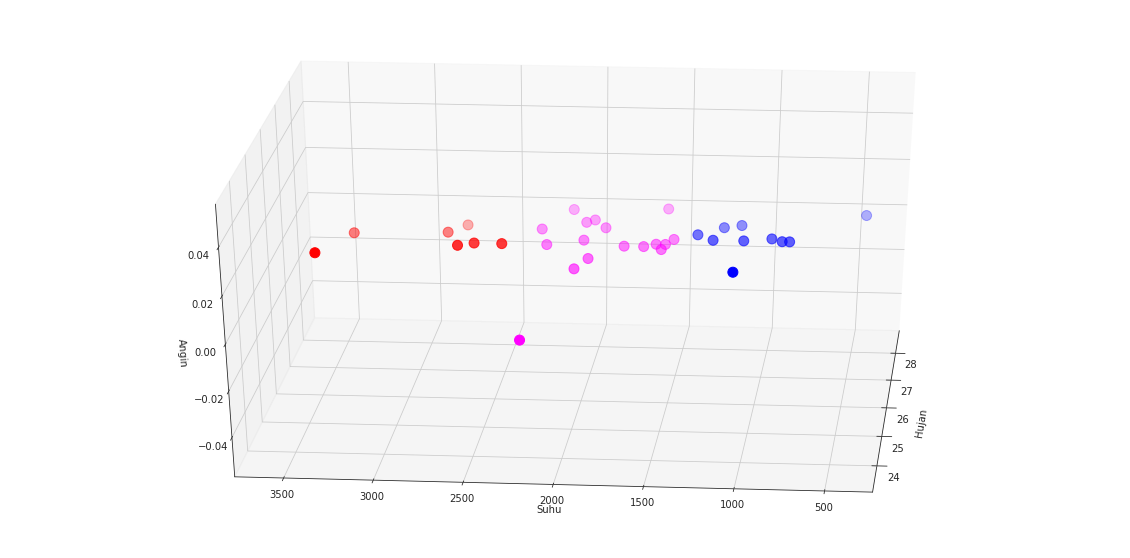

In [ ]:
# Visualisasi hasil clusters 3D
sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
ax.view_init(30, 185)
plt.xlabel("Hujan")
plt.ylabel("Suhu")
ax.set_zlabel('Angin')
plt.show()